# 750 MeV/u

In [1]:
import jpype
jpype.startJVM(jpype.getDefaultJVMPath())

In [2]:
import matplotlib
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [4]:
with open('spill_data_bxscint_2022_10_26_16h17m42s/spill_data_bxscint_2022_10_26_16h17m42s.p', 'rb') as f:
    data = pickle.load(f)

In [5]:
data[0][0]

datetime.datetime(2022, 10, 26, 16, 17, 43, 990892)

In [6]:
time_list = []
for i in range(len(data[0])):
    time_list.append(data[0][i].strftime("%Hh%Mm%Ss"))

In [7]:
data[1].keys()

dict_keys(['BXSCINT_1000/Acquisition', 'BXSCINT_1001/Acquisition'])

In [8]:
data[1]['BXSCINT_1000/Acquisition'][0].keys()

dict_keys(['coincidenceDeviceName', 'highVoltageDefault', 'superCycleNb', 'counts', 'countsCoincidence', 'highVoltage', 'deviceName', 'moduleHardwareeventMonitorWD', 'countArray', 'acqTime', 'moduleHardwareAcquisitionWd', 'delay', 'acqState', 'deviceDetailedStatus', 'fifoFreq', 'inOutPosition', 'countNumber', 'equipmentName', 'countCoincidenceArray', 'beamID', 'delayDefault', 'acqMsg'])

In [9]:
data[1]['BXSCINT_1000/Acquisition'][0]["countArray"]

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [10]:
data[1]['BXSCINT_1000/Acquisition'][0]["fifoFreq"]

2000

# Plot

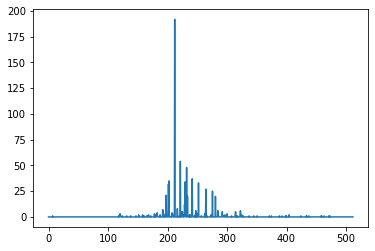

In [11]:
fig, ax = plt.subplots()
for i in range(50):

    signal_1000 = data[1]['BXSCINT_1000/Acquisition'][50+i]["countArray"]
    fifoFreq = data[1]['BXSCINT_1000/Acquisition'][0]["fifoFreq"]

    nbOfSamples = len(signal_1000)
    integrationDuration = nbOfSamples*(1/fifoFreq)*1000 # in ms

    t = np.arange(0, integrationDuration, integrationDuration / nbOfSamples)

    d = {'t': t, 'signal_1000': signal_1000}
    df = pd.DataFrame(data=d)


ax.plot(df.t, df.signal_1000)

In [12]:
heatmap = np.reshape(signal_1000, (1, len(signal_1000)))

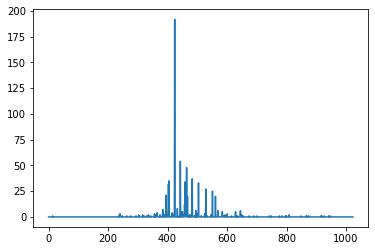

In [13]:
fig, ax = plt.subplots()
ax.plot(df.signal_1000)

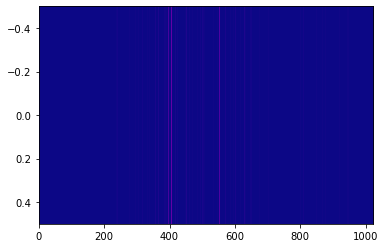

In [14]:
fig, ax = plt.subplots()
ax.imshow(heatmap, cmap="plasma", aspect='auto', interpolation="none")

In [15]:
signal_1000 = data[1]['BXSCINT_1000/Acquisition'][0]["countArray"]
heatmap = np.reshape(signal_1000, (1, len(signal_1000)))
for i in range(len(data[1]['BXSCINT_1000/Acquisition'])):
    signal_1000 = data[1]['BXSCINT_1000/Acquisition'][i]["countArray"]
    heatmap=np.vstack([signal_1000, heatmap])

Text(0.5, 1.0, '750 MeV/u')

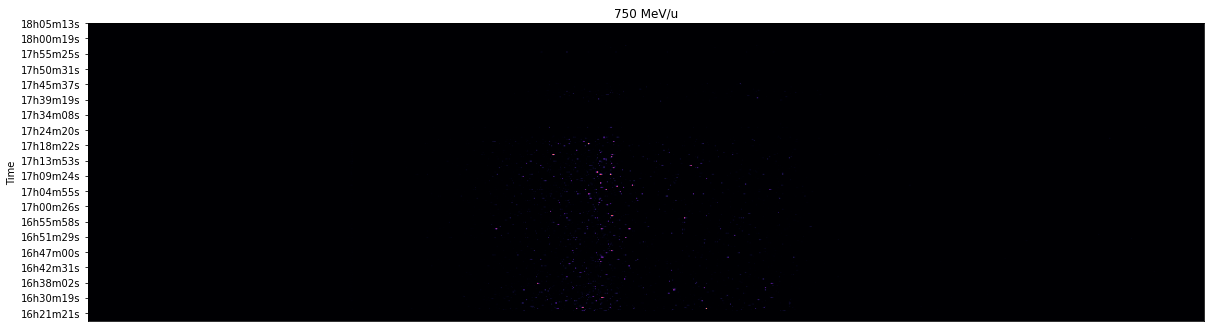

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(heatmap[:len(heatmap)], cmap="magma")

x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
step = np.shape(heatmap)[0]//20 + 1
ax.set_yticks(np.arange(0, np.shape(heatmap)[0],  step))
try:
    ax.set_yticklabels(time_list[::-step]) # Reverse order
except:
    print("error on yticklabels")

ax.set_ylabel("Time")
ax.set_title("750 MeV/u")
# plt.savefig("bxscint_spill_history_750_MeV.png", facecolor='white', transparent=False, dpi = 300, bbox_inches='tight')